<a href="https://colab.research.google.com/github/Osamaulani/Analisis-Deret-Waktu-/blob/main/Tugas_Besar_ADW_Kelompok6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kelompok 6 Analisis Deret Waktu

*   Osa Nastiyar Maulani - 1305210055
*   Nurwulan Handayani - 1305210102
*   Egi Dhea Nagita - 1305213009



Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.metrics import mean_squared_error
import warnings

## Pre-Process Data

In [ ]:
shipping_data = pd.read_excel('6. data biaya pengiriman.xlsx')
shipping_data


,Order Date,Shipping Cost ($)
0,2014-01-01,92.56
1,2014-01-01,103.20
2,2014-01-01,104.69
3,2014-01-01,107.44
4,2014-01-01,112.75
...,...,...
995,2014-02-05,249.72
996,2014-02-05,179.01
997,2014-02-05,223.78
998,2014-02-05,224.25


In [ ]:
shipping_data_cleaned = shipping_data.dropna()

In [ ]:
# Mengecek apakah ada missing values dalam DataFrame
missing_values = shipping_data_cleaned.isnull().values.any()

if missing_values:
    print("Terdapat missing values dalam DataFrame.")
else:
    print("Tidak ada missing values dalam DataFrame.")


Tidak ada missing values dalam DataFrame.


In [ ]:
shipping_data

,Order Date,Shipping Cost ($)
0,2014-01-01,92.56
1,2014-01-01,103.20
2,2014-01-01,104.69
3,2014-01-01,107.44
4,2014-01-01,112.75
...,...,...
995,2014-02-05,249.72
996,2014-02-05,179.01
997,2014-02-05,223.78
998,2014-02-05,224.25


## Plot Data

Lambda dari transformasi Box-Cox: 0.5583271957569993


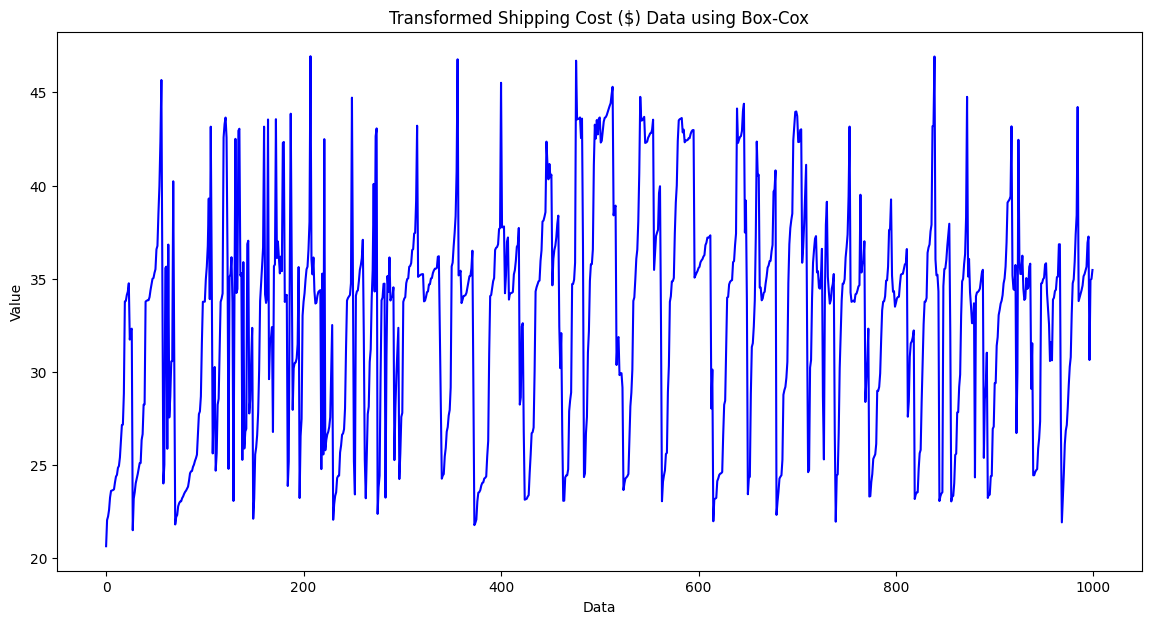

In [ ]:
from scipy.stats import boxcox

# Transformasi menggunakan Box-Cox
transformed_data, lambda_val = boxcox(shipping_data['Shipping Cost ($)'])
print(f"Lambda dari transformasi Box-Cox: {lambda_val}")

plt.figure(figsize=(14, 7))
plt.plot(transformed_data, color='blue')
plt.title('Transformed Shipping Cost ($) Data using Box-Cox')
plt.xlabel('Data')
plt.ylabel('Value')
plt.show()


Setelah dilakukan analisis terhadap plot data, tampaknya data yang kami punya menunjukkan karakteristik stasioneritas. Namun, mari kita buktikan hal ini dengan melalui Uji Augmented Dickey-Fuller (ADF).

## **Uji Box-cox**

In [ ]:
def is_homoskedastic(p_value, significance_level=0.05):
    """
    Checker untuk homoskedastisitas berdasarkan nilai p-value.

    Parameters:
    - p_value (float): Nilai p dari uji heteroskedastisitas.
    - significance_level (float): Tingkat signifikansi yang digunakan untuk menentukan keberhasilan.

    Returns:
    - True jika homoskedastis (tidak ada bukti statistik signifikan untuk heteroskedastisitas), False sebaliknya.
    """
    return p_value >= significance_level

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

X_before = np.arange(len(shipping_data['Shipping Cost ($)']))
X_before = sm.add_constant(X_before)
model_before = sm.OLS(shipping_data['Shipping Cost ($)'], X_before)
results_before = model_before.fit()

# Residual sebelum transformasi
residuals_before = results_before.resid

# Uji Breusch-Pagan-Godfrey sebelum transformasi
_, p_value_before, _, _ = het_breuschpagan(residuals_before, X_before)
print(f'P-value sebelum transformasi: {p_value_before}')
homoskedastic_after = is_homoskedastic(p_value_before)
if homoskedastic_after:
    print("Residu setelah transformasi adalah homoskedastis.")
else:
    print("Residu setelah transformasi mungkin heteroskedastis.")

P-value sebelum transformasi: 0.14864417838031532
Residu setelah transformasi adalah homoskedastis.


Lambda value used for Transformation: 0.5583271957569993


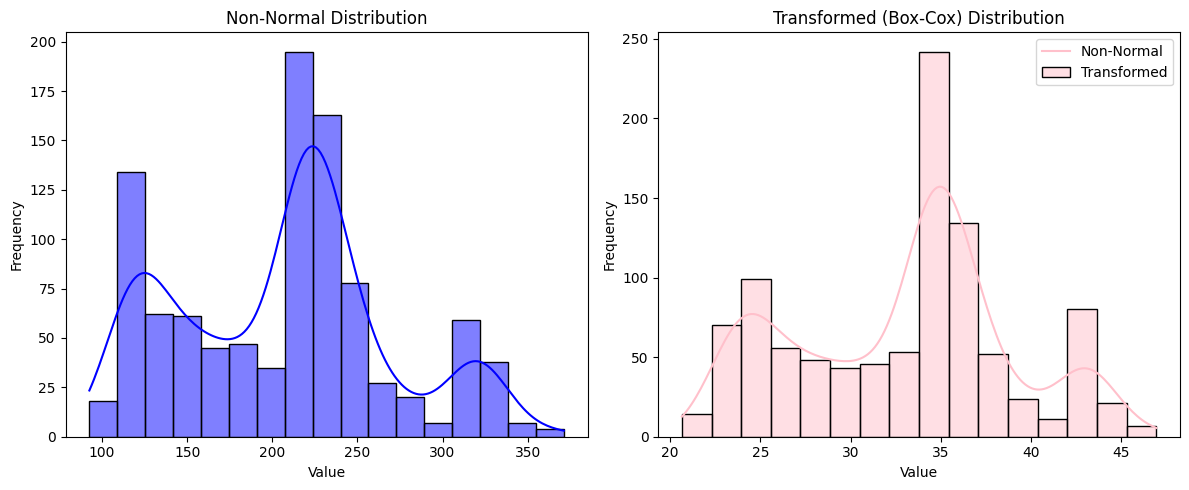

In [ ]:
import seaborn as sns
from scipy.stats import boxcox
fitted_data, fitted_lambda = boxcox(shipping_data['Shipping Cost ($)'])

# Plot distribusi sebelum transformasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(shipping_data['Shipping Cost ($)'], kde=True, color='blue')
plt.title('Non-Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plot distribusi setelah transformasi
plt.subplot(1, 2, 2)
sns.histplot(fitted_data, kde=True, color='Pink')
plt.title('Transformed (Box-Cox) Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Menambahkan legenda ke subplot
plt.legend(['Non-Normal', 'Transformed'], loc='upper right')

# Menampilkan lambda yang digunakan untuk transformasi
print(f"Lambda value used for Transformation: {fitted_lambda}")

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import skew

# Menghitung skewness sebelum transformasi
skewness_before = skew(shipping_data['Shipping Cost ($)'])

# Menghitung skewness setelah transformasi
skewness_after = skew(fitted_data)

# Menampilkan hasil skewness
print(f"Skewness Sebelum Transformasi: {skewness_before}")
print(f"Skewness Setelah Transformasi: {skewness_after}")

# Interpretasi skewness
if abs(skewness_before) < abs(skewness_after):
    print("Transformasi Box-Cox telah mengurangi skewness.")
elif abs(skewness_before) > abs(skewness_after):
    print("Transformasi Box-Cox telah meningkatkan skewness.")
else:
    print("Skewness tidak berubah setelah transformasi.")

Skewness Sebelum Transformasi: 0.213824088458433
Skewness Setelah Transformasi: -0.04876114874687154
Transformasi Box-Cox telah meningkatkan skewness.


## **Analisis**

## **Uji ADF**

In [ ]:
# Perform Augmented Dickey-Fuller test on 'Shipping Cost ($)' column
adf_test = adfuller(shipping_data['Shipping Cost ($)'])

# Output the results
print("Hasil uji ADF untuk kolom 'Shipping Cost ($)':")
print("Nilai statistik uji:", adf_test[0])
print("Nilai p-value:", adf_test[1])
print("Nilai Kritis:")
print(f"   1%: {adf_test[4]['1%']}")
print(f"   5%: {adf_test[4]['5%']}")
print(f"   10%: {adf_test[4]['10%']}")

# Menentukan apakah data cenderung stasioner
if adf_test[0] < adf_test[4]['1%'] and adf_test[1] < 0.05:
    print("P-value kurang dari 0.05. H0 ditolak. Data cenderung bersifat stasioner")
else:
    print("P-value lebih dari atau sama dengan 0.05. Tidak cukup bukti untuk menolak H0. Data mungkin tidak stasioner.")

Hasil uji ADF untuk kolom 'Shipping Cost ($)':
Nilai statistik uji: -8.103639428006943
Nilai p-value: 1.2800020576619874e-12
Nilai Kritis:
   1%: -3.4370198458812156
   5%: -2.864484708707697
   10%: -2.568337912084273
P-value kurang dari 0.05. H0 ditolak. Data cenderung bersifat stasioner


## **Analisis**

Berdasarkan hasil perhitungan dengan Uji ADF dapat dilihat bahwa nilai P-Value lebih kecil dari tingkat signifikansi umum 0.05 (atau 5%). Maka dapat disimpulkan bahwa Data bersifat Stationer, Nilai komponen integral adalah 0, tidak memerlukan diferencing data,Dan Dengan nilai statistik uji yang sangat negatif dan nilai p-value yang sangat kecil (1.2800020576619874e-12), kita memiliki cukup bukti untuk menolak hipotesis nol (H0).




## ACF dan PACF

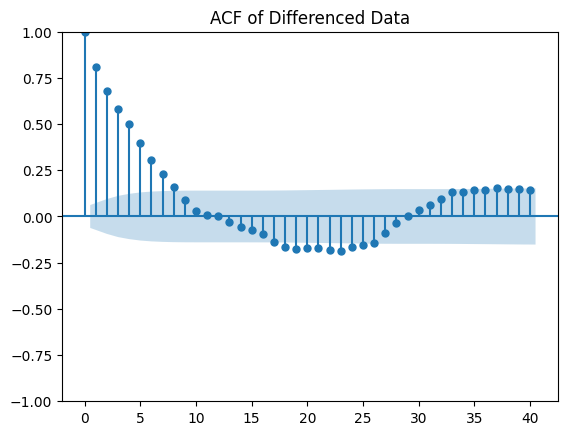

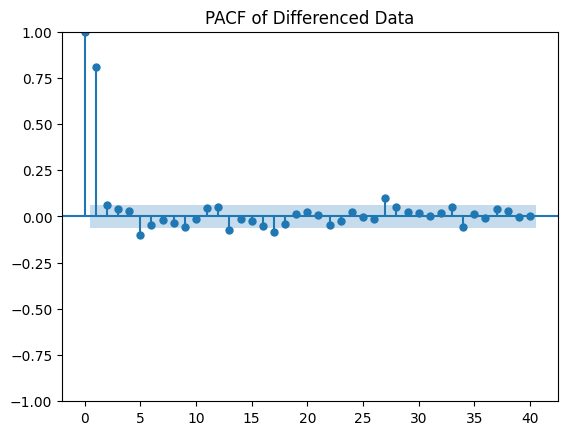

In [ ]:
# Plot ACF and PACF
plot_acf(shipping_data['Shipping Cost ($)'].dropna(), lags=40)
plt.title('ACF of Differenced Data')
plot_pacf(shipping_data['Shipping Cost ($)'].dropna(), lags=40)
plt.title('PACF of Differenced Data')
plt.show()


**ACF (Fungsi Autokorelasi)**

ACF adalah ukuran korelasi antara nilai tertunda dari deret waktu.ACF pada lag 0 selalu bernilai 1. ini menunjukkan korelasi sempurna karena setiap time series berkorelasi sempurna pada waktu yang bersamaan. Pada lag 1, kira-kira 0,77.
Artinya nilai pada waktu t berkorelasi sedang dengan nilai pada waktu t-1.
Pada lag 2, ACF sekitar 0,71, menunjukkan korelasi yang menurun namun masih rasional antara waktu t dan waktu t-2.
terlihat bahwa Nilai ACF terus menurun seiring bertambahnya lag, menunjukkan penurunan korelasi  dengan nilai-nilai sebelumnya dalam deret waktu.




**PACF (Fungsi Autokorelasi Parsial)**

PACF adalah ukuran korelasi antara nilai tertunda dari deret waktu setelah efek dari lag sebelumnya telah dihilangkan. PACF pada lag 0 juga mempunyai nilai 1 yang menunjukkan korelasi variabel yang sempurna. Pada lag 1, PACF  sekitar 0,76. Ini menunjukkan pengaruh langsung dari nilai pada waktu t-1 terhadap nilai pada waktu t setelah memperhitungkan pengaruh lag lainnya.Pada lag 2, PACF turun secara signifikan menjadi sekitar 0,12, yang menunjukkan bahwa pengaruh langsung  nilai pada waktu t-2 terhadap nilai pada waktu t setelah memperhitungkan lag lainnya lebih lemah.
 Nilai PACF setelah lag 2 cukup kecil dan menurun, menunjukkan bahwa penundaan setelah lag 2 mempunyai pengaruh langsung yang kecil terhadap nilai pada waktu t.


## Identifikasi Model
Kami menggunakan model ARMA karena merupakan data stationer, maka tidak perlu menggunakan model ARIMA.Karena data telah terbukti stasioner melalui uji Augmented Dickey-Fuller(ADF). Model ARIMA sendiri dirancang sebagai generalisasi dari model ARMA dan dapat menangani data non-stasioner dengan menerapkan differencing.Melakukan differencing pada data stasioner dapat mengakibatkan hilangnya atau berkurangnya informasi yang terkandung dalam data tersebut. Oleh karena itu, dalam kasus data yang sudah stasioner, penggunaan Model ARIMA dengan differencing tidak disarankan.

In [ ]:
warnings.filterwarnings('ignore')
# Convert shipping_data to numeric type
shipping_data['Shipping Cost ($)'] = pd.to_numeric(shipping_data['Shipping Cost ($)'], errors='coerce')

# Mencari kombinasi (p,q) menggunakan AIC
aic_values = []
for p in range(1, 9):
    for q in range(1, 9):
        model_arma = sm.tsa.ARIMA(shipping_data['Shipping Cost ($)'].dropna(), order=(p, 0, q))
        results = model_arma.fit()
        aic = results.aic
        aic_values.append((p, q, aic))

for p, q, aic in aic_values:
    print(f"ARMA({p},{q}) - AIC: {aic}")

ARMA(1,1) - AIC: 10036.909396546547
ARMA(1,2) - AIC: 10037.871689293363
ARMA(1,3) - AIC: 10039.869279681865
ARMA(1,4) - AIC: 10030.74856214213
ARMA(1,5) - AIC: 10031.771888681478
ARMA(1,6) - AIC: 10033.022546933853
ARMA(1,7) - AIC: 10032.932886543638
ARMA(1,8) - AIC: 10031.537746885053
ARMA(2,1) - AIC: 10038.249832918365
ARMA(2,2) - AIC: 10039.484009430213
ARMA(2,3) - AIC: 10032.607260046554
ARMA(2,4) - AIC: 10029.377692395621
ARMA(2,5) - AIC: 10031.131849145044
ARMA(2,6) - AIC: 10032.794253755614
ARMA(2,7) - AIC: 10032.869022959421
ARMA(2,8) - AIC: 10032.559096102586
ARMA(3,1) - AIC: 10039.609582024019
ARMA(3,2) - AIC: 10027.421888233392
ARMA(3,3) - AIC: 10027.428407355523
ARMA(3,4) - AIC: 10031.056570640105
ARMA(3,5) - AIC: 10033.121523585209
ARMA(3,6) - AIC: 10027.123671756548
ARMA(3,7) - AIC: 10027.99918123128
ARMA(3,8) - AIC: 10024.767433061714
ARMA(4,1) - AIC: 10038.001921204355
ARMA(4,2) - AIC: 10027.292496553757
ARMA(4,3) - AIC: 10029.745603932599
ARMA(4,4) - AIC: 10027.2839081

## Model ARMA Terbaik
Dalam menentukan model ARMA (p, q) atau ARIMA (p, d, q), kita menggunakan kriteria informasi Akaike (AIC) untuk memilih model yang paling sesuai. AIC adalah ukuran yang digunakan untuk membandingkan model-model statistik yang berbeda. Model dengan nilai AIC yang lebih rendah dianggap lebih baik karena menunjukkan kesesuaian yang baik dengan data sambil menghindari overfitting.

In [ ]:
best_model_params = min(aic_values, key=lambda x: x[2])
best_p, best_q, best_aic = best_model_params

print(f"Best ARMA({best_p}, {best_q}) Model - AIC: {best_aic}")

Best ARMA(3, 8) Model - AIC: 10024.767433061714


In [ ]:
# Estimasi parameter menggunakan metode Maximum Likelihood
print(results.summary())

# Uji signifikansi terhadap parameter
print(results.pvalues)


                               SARIMAX Results                                
Dep. Variable:      Shipping Cost ($)   No. Observations:                 1000
Model:                 ARIMA(3, 0, 8)   Log Likelihood               -4999.384
Date:                Sun, 31 Dec 2023   AIC                          10024.767
Time:                        13:38:58   BIC                          10088.568
Sample:                             0   HQIC                         10049.016
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        206.5627      6.917     29.862      0.000     193.005     220.120
ar.L1          0.8828      0.087     10.163      0.000       0.713       1.053
ar.L2         -0.9908      0.063    -15.799      0.0

## Estimasi parameter menggunakan metode Maximum Likelihood

In [ ]:
#Estimasi Parameter dengan Metode Maximum Likelihood (ML)
# Lakukan fitting model ARIMA/ARMA menggunakan data
model = sm.tsa.ARIMA(shipping_data['Shipping Cost ($)'].dropna(), order=(3, 0, 8))
results = model.fit()

# Estimasi Parameter dengan Metode Maximum Likelihood
ml_parameter_estimates = results.params
p_values = results.pvalues

print("Estimasi Parameter dengan Metode Maximum Likelihood:")
print(ml_parameter_estimates)
print("\nP-Values for Parameter Estimates:")
print(p_values)



Estimasi Parameter dengan Metode Maximum Likelihood:
const      206.562662
ar.L1        0.882775
ar.L2       -0.990816
ar.L3        0.646268
ma.L1       -0.142027
ma.L2        0.948377
ma.L3        0.067774
ma.L4        0.208583
ma.L5        0.110372
ma.L6        0.188270
ma.L7        0.109011
ma.L8        0.091226
sigma2    1287.534962
dtype: float64

P-Values for Parameter Estimates:
const     6.161810e-196
ar.L1      2.892396e-24
ar.L2      3.150984e-56
ar.L3      5.385334e-16
ma.L1      1.021969e-01
ma.L2      5.607322e-75
ma.L3      4.664748e-01
ma.L4      7.295257e-03
ma.L5      1.145052e-01
ma.L6      1.434983e-03
ma.L7      6.269157e-03
ma.L8      3.297589e-02
sigma2    4.171068e-219
dtype: float64


## diuji siginifikasi terhadap parameter.

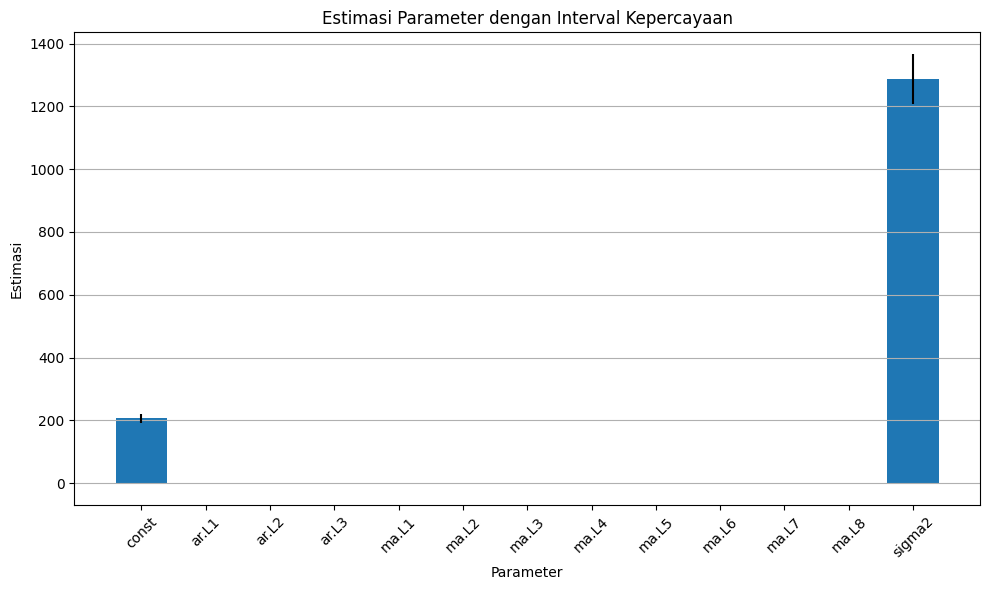

In [ ]:
# Import library yang diperlukan
import matplotlib.pyplot as plt

# Estimasi parameter dengan metode Maximum Likelihood
ml_parameter_estimates = results.params

# Interval kepercayaan (jika tersedia)
confidence_intervals = results.conf_int()

# Ambil nama parameter
parameter_names = ml_parameter_estimates.index

# Plot estimasi parameter beserta interval kepercayaannya
plt.figure(figsize=(10, 6))
plt.bar(parameter_names, ml_parameter_estimates, yerr=(ml_parameter_estimates - confidence_intervals[0], confidence_intervals[1] - ml_parameter_estimates))
plt.title('Estimasi Parameter dengan Interval Kepercayaan')
plt.xlabel('Parameter')
plt.ylabel('Estimasi')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Estimasi ini telah diperoleh dengan menggunakan metode **Maximum Likelihood Estimation (MLE**), yang mencari nilai parameter yang paling mungkin menghasilkan data yang diamati.



**Parameter Estimasi:**

const: Konstanta atau intercept sebesar 206.562662, ini merupakan nilai rata-rata jangka panjang dari seri waktu yang diestimasi oleh model, asumsi ini didasarkan pada model yang tidak stasioner dalam rata-rata.

ar.L1 (0.882775), ar.L2 (-0.990816), ar.L3 (0.646268): Ini adalah koefisien untuk tiga lag pertama dari komponen autoregresif model. Nilai-nilai ini menunjukkan bagaimana nilai pada waktu sebelumnya (lag) mempengaruhi nilai saat ini. Misalnya, nilai positif pada ar.L1 menunjukkan korelasi positif dengan lag pertama, sedangkan nilai negatif pada ar.L2 menunjukkan korelasi negatif dengan lag kedua, dan seterusnya.

ma.L1 hingga ma.L8: Ini adalah koefisien untuk delapan lag pertama dari komponen moving average. Koefisien ini menunjukkan pengaruh nilai residu (kesalahan prediksi) dari waktu sebelumnya terhadap nilai saat ini. Sebagai contoh, ma.L2 yang tinggi menunjukkan bahwa residu dari lag kedua mempunyai pengaruh kuat terhadap nilai saat ini.

sigma2 (1287.534962): Ini adalah estimasi varians dari istilah kesalahan (residu) dari model, yang menunjukkan tingkat fluktuasi yang tidak dijelaskan oleh model di sekitar rata-rata seri waktu.

**p-value:**

const, ar.L1, ar.L2, ar.L3, ma.L2, ma.L4 sampai ma.L8, dan sigma2 memiliki p-value yang sangat kecil, menunjukkan bahwa mereka signifikan secara statistik
ma.L1, ma.L3, dan ma.L5: memiliki p-value yang lebih tinggi dari 0.05, yang menunjukkan bahwa mereka mungkin tidak signifikan secara statistik. Ini bisa berarti bahwa beberapa koefisien MA mungkin tidak perlu untuk model dan bisa dihilangkan untuk menyederhanakan model.

Model ini menunjukkan bahwa beberapa lags dari komponen AR dan MA sangat signifikan, sementara beberapa lainnya mungkin tidak diperlukan. Keberadaan koefisien AR dan MA yang signifikan menunjukkan adanya pola autokorelasi dan dependensi dalam residu yang berhasil dimodelkan. Namun, kehadiran banyak parameter bisa juga mengindikasikan model yang overfitted, Penting juga untuk mempertimbangkan aspek lain dari output model seperti, tes Ljung-Box untuk autokorelasi residu, dan tes lainnya untuk normalitas.

##Uji Kelayakanmodel dengan Ljung-Box

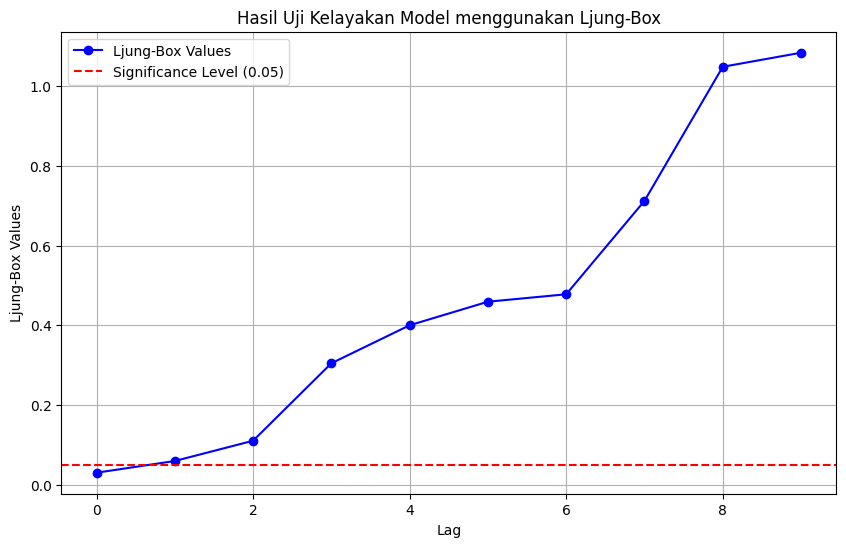

Hasil uji Ljung-Box:
[[[0.03040998 0.0598037  0.11061157 0.30487223 0.40018505 0.45924398
   0.47789739 0.71218069 1.04836885 1.08362909]
  [0.86156323 0.97054079 0.99053428 0.98949749 0.99532449 0.99829968
   0.99952346 0.99949527 0.99931771 0.99975152]]]


In [ ]:
# Uji kelayakan model dengan Ljung-Box
lb_test = results.test_serial_correlation(method='ljungbox')

# Ambil nilai statistik Ljung-Box
lb_values = lb_test[0]

# Plot hasil uji Ljung-Box
plt.figure(figsize=(10, 6))
plt.plot(lb_values[0], marker='o', linestyle='-', color='b', label='Ljung-Box Values')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')
plt.title('Hasil Uji Kelayakan Model menggunakan Ljung-Box')
plt.xlabel('Lag')
plt.ylabel('Ljung-Box Values')
plt.legend()
plt.grid(True)
plt.show()

print("Hasil uji Ljung-Box:")
print(lb_test)

**Uji Ljung-Box** adalah sebuah metode statistik yang digunakan untuk menguji apakah terdapat autokorelasi pada nilai residual dari suatu model time series. Autokorelasi terjadi ketika nilai-nilai dalam sebuah seri waktu berkorelasi dengan nilai-nilai sebelumnya.

nilai-nilai Ljung-Box diplot untuk berbagai 'lag' (yaitu, jumlah periode waktu sebelumnya yang digunakan untuk perhitungan autokorelasi). Garis putus-putus merah menunjukkan tingkat signifikansi sebesar 0.05 (5%). Jika nilai Ljung-Box melampaui garis ini, maka ada bukti yang cukup untuk menolak hipotesis nol bahwa tidak ada autokorelasi pada lag tertentu.

nilai Ljung-Box berada di atas garis merah (tingkat signifikansi 0.05) untuk lag yang lebih tinggi. Nilai p-value tetap sangat tinggi di atas 0.05 untuk semua lag ini mengindikasikan bahwa untuk lag-lag tersebut, ada bukti statistik yang cukup untuk menolak hipotesis nol yang menyatakan tidak ada autokorelasi. Dengan kata lain, terdapat autokorelasi yang signifikan pada lag-lag tersebut, yang menunjukkan bahwa model tidak sempurna dan masih ada pola dalam data seri waktu yang tidak ditangkap oleh model.

## Kolmogorov-Smirnov Test

Hasil uji Kolmogorov-Smirnov:
KstestResult(statistic=0.5277438819879874, pvalue=3.352292816304082e-260, statistic_location=2.397392263905033, statistic_sign=-1)


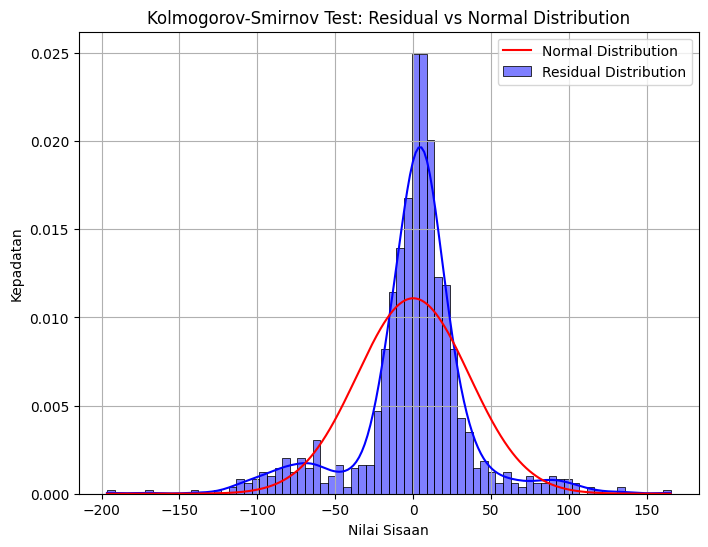

In [ ]:
import numpy as np  # Import NumPy for numerical operations
from scipy import stats  # Import SciPy's stats module for statistical functions

# Kolmogorov-Smirnov Test
ks_test = kstest(results.resid, 'norm')
print("Hasil uji Kolmogorov-Smirnov:")
print(ks_test)

# Plot distribusi sisaan terhadap distribusi normal
plt.figure(figsize=(8, 6))
sns.histplot(results.resid, kde=True, stat='density', color='blue', label='Residual Distribution')
x = np.linspace(np.min(results.resid), np.max(results.resid), 1000)
plt.plot(x, stats.norm.pdf(x, np.mean(results.resid), np.std(results.resid)), 'r-', label='Normal Distribution')
plt.title('Kolmogorov-Smirnov Test: Residual vs Normal Distribution')
plt.xlabel('Nilai Sisaan')
plt.ylabel('Kepadatan')
plt.legend()
plt.grid(True)
plt.show()


**Residu vs Normal**

Dari gambar, terlihat bahwa terdapat ketidaksesuaian yang signifikan antara distribusi residu dan kurva distribusi normal, terutama di bagian tengah distribusi di mana histogram menunjukkan puncak yang lebih tinggi daripada yang diharapkan untuk distribusi normal, serta ekor yang lebih panjang. Ini menunjukkan bahwa residu memiliki distribusi dengan kurtosis yang lebih tinggi (lebih "puncak") dan kemungkinan ekor yang lebih berat dibandingkan dengan distribusi normal.

**Hasil Uji Kolmogorov-Smirnov**

Statistic: 0.5277438819879874

p-value: 3.352292816304082e-260

Statistic location: 2.397392263905033

Statistic sign: -1

**Statistic pada uji Kolmogorov-Smirnov** mengukur jarak terjauh antara kurva kumulatif empiris (dari data) dan kurva kumulatif yang diharapkan dari distribusi normal. Nilai statistic sebesar 0.5277 (lebih dari 0.5) menunjukkan bahwa ada perbedaan yang sangat signifikan antara distribusi residu dengan distribusi normal.

**p-value** memberikan indikasi tentang signifikansi statistik dari hasil ini. Dengan p-value sekecil 3.352292816304082e-260 (kurang dari 0.05), kita dengan sangat yakin dapat menolak hipotesis nol bahwa data berasal dari distribusi normal. Ini berarti bahwa ada bukti statistik yang sangat kuat bahwa residu tidak terdistribusi normal.

**Statistic location dan Statistic sign** memberikan informasi tambahan tentang lokasi dan arah dari perbedaan terbesar antara distribusi empiris dan teoretis.

## Shapiro-Wilks Test

Hasil uji Shapiro-Wilks:
ShapiroResult(statistic=0.886590301990509, pvalue=1.9569693098917494e-26)


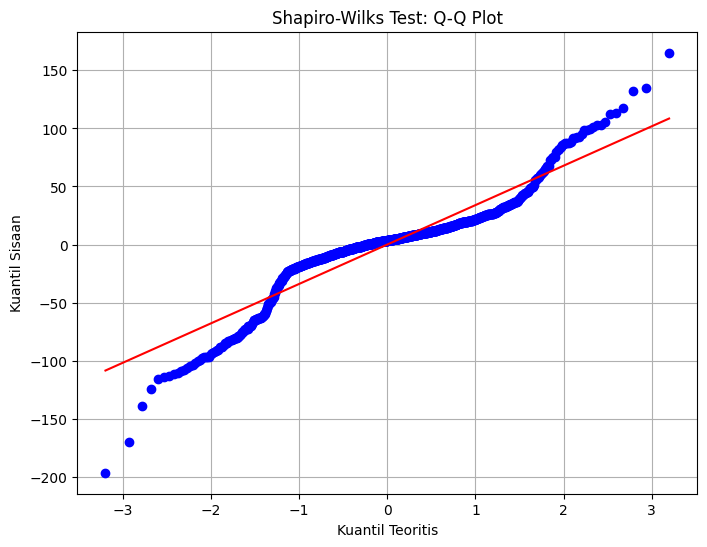

In [ ]:
# Shapiro-Wilks Test
shapiro_test = shapiro(results.resid)
print("Hasil uji Shapiro-Wilks:")
print(shapiro_test)

# QQ Plot untuk melihat kesesuaian dengan distribusi normal
plt.figure(figsize=(8, 6))
stats.probplot(results.resid, dist="norm", plot=plt)
plt.title('Shapiro-Wilks Test: Q-Q Plot')
plt.xlabel('Kuantil Teoritis')
plt.ylabel('Kuantil Sisaan')
plt.grid(True)
plt.show()



**Q-Q plot** adalah alat grafis untuk membantu kita menilai apakah suatu distribusi data mengikuti distribusi tertentu, dalam kasus ini, berdistribusi normal.

Dari plot tersebut, kita melihat bahwa sebagian besar titik biru mengikuti garis merah, tetapi ada beberapa penyebaran, terutama pada ekor-ekor distribusi (ujiannya di ujung-ujung kiri dan kanan plot), yang menunjukkan adanya kemungkinan penyimpangan dari distribusi normal.

**Uji Shapiro-Wilks** adalah tes formal untuk kenormalan.

Hasil yang diberikan:

Statistic: 0.886590301990509

p-value: 1.9569693098917494e-26

Statistic, nilai yang lebih dekat ke 1 menunjukkan bahwa data lebih normal. Nilai 0.8865 menunjukkan adanya penyimpangan dari normalitas, tetapi untuk menentukan signifikansinya, kita perlu melihat p-value.

p-value, Nilai yang sangat kecil (biasanya kurang dari 0.05) menolak hipotesis nol bahwa data berasal dari distribusi normal. Dalam kasus ini, p-value sangat kecil (1.9569693098917494e-26), jauh di bawah ambang batas 0.05, yang secara statistik menunjukkan bahwa residu tidak terdistribusi normal.

## Analisis Forecasting

In [ ]:
# Assuming df is your DataFrame and 'Shipping Cost ($)' is your column of interest
shipping_data['Shipping Cost ($)'] = pd.to_numeric(shipping_data['Shipping Cost ($)'], errors='coerce')

# Fit the best ARIMA model
best_model = sm.tsa.ARIMA(shipping_data['Shipping Cost ($)'].dropna(), order=(3, 0, 8))
best_results = best_model.fit()

# Target forecasting dalam hari
forecast_steps = 365
forecast = best_results.get_forecast(steps=forecast_steps)

print(f"Analisis Forecasting {forecast_steps} Hari")
forecast_data = pd.DataFrame(forecast.predicted_mean)

# Mencari hasil dari metode ARMA(3, 0, 8)
np.random.seed(42)
model_arma = sm.tsa.ARIMA(shipping_data['Shipping Cost ($)'].dropna(), order=(3, 0, 8))
results_arma = model_arma.fit()

n_simulated_steps = forecast_steps
pred = results_arma.get_prediction(start=len(shipping_data['Shipping Cost ($)']), end=len(shipping_data['Shipping Cost ($)']) + n_simulated_steps - 1, dynamic=True)
predicted_values = pred.predicted_mean
std_errors = pred.se_mean
residuals = results_arma.resid
simulated_data = np.zeros(n_simulated_steps)

for i in range(n_simulated_steps):
    simulated_data[i] = predicted_values.iloc[i] + np.random.normal(0, std_errors.iloc[i]) + residuals.iloc[-1]

print("Simulasi data ARMA:")
arma_sim = simulated_data.copy()
print(abs(arma_sim))

Analisis Forecasting 365 Hari
Simulasi data ARMA:
[239.62964118 209.87880387 244.69850391 296.08825081 202.06825817
 201.55509972 308.9691383  258.20969185 180.9959121  245.77488229
 181.31484332 179.56495346 224.43000225  88.29188525 100.22596788
 173.12268465 144.1654899  229.46387527 151.91134918 119.06863222
 301.93770373 194.78124753 213.86689139 118.37902067 174.01230662
 216.06784587 136.11633431 233.1377011  170.53602339 190.34547026
 170.97841014 327.23886172 208.04149189 141.52319566 261.6040965
 131.47844108 222.2941837   84.07123637 124.51753979 221.7715936
 256.09717371 219.85396905 201.70848504 190.01705042 114.90432701
 163.11248929 179.69851301 276.50954834 231.00844944  96.68790815
 229.67523033 184.59984648 166.00180435 248.00232186 274.70754341
 268.43435939 155.6610689  189.35875632 230.13429165 271.23468271
 178.59120884 197.24631897 138.5579545  132.86588965 260.87190079
 295.48621254 204.46158048 272.99720303 232.13720376 167.99067989
 232.08204354 307.04579338 2

## Melakukan forecasting, kemudian menghitung RMSE

RMSE: 51.12051289619597


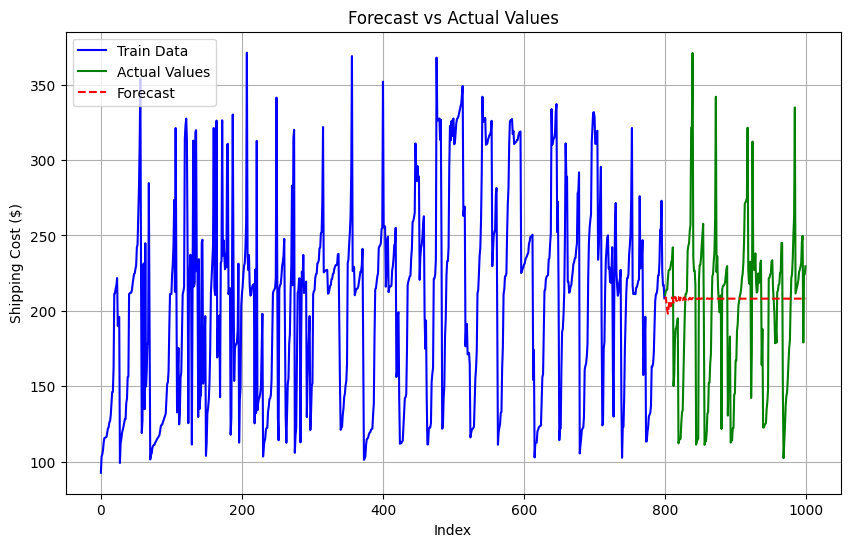

In [ ]:
# Lakukan fitting model menggunakan train_data
model = sm.tsa.ARIMA(train_data['Shipping Cost ($)'], order=(3, 0, 8))
results = model.fit()

# Lakukan forecasting untuk periode yang ada di test_data
forecast = results.get_forecast(steps=len(test_data))
forecast_values = forecast.predicted_mean

# Menggunakan test_data sebagai nilai aktual untuk menghitung RMSE
true_values = test_data['Shipping Cost ($)']
rmse = mean_squared_error(true_values, forecast_values, squared=False)
print("RMSE:", rmse)

# Plot hasil prediksi dan data aktual
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Shipping Cost ($)'], label='Train Data', color='blue')
plt.plot(test_data.index, true_values, label='Actual Values', color='green')
plt.plot(test_data.index, forecast_values, label='Forecast', color='red', linestyle='--')
plt.title('Forecast vs Actual Values')
plt.xlabel('Index')
plt.ylabel('Shipping Cost ($)')
plt.legend()
plt.grid(True)
plt.show()


RMSE (Root Mean Square Error), adalah nilai yang memberitahu kita seberapa jauh rata-rata kesalahan prediksi dari nilai yang sebenarnya (nilai aktual). Di sini, RMSE adalah sekitar 51.12, yang artinya rata-rata, prediksi tentang biaya pengiriman meleset sekitar 51.12 dari yang sebenarnya. Angka ini membantu kita mengerti seberapa akurat prediksi yang dibuat. Jika angka ini kecil, berarti prediksi kita cukup tepat. jika besar, maka ada yang perlu kita perbaiki dalam cara kita membuat prediksi tersebut.

In [ ]:
forecast_data['simulated_arima'] = abs(arma_sim.copy())

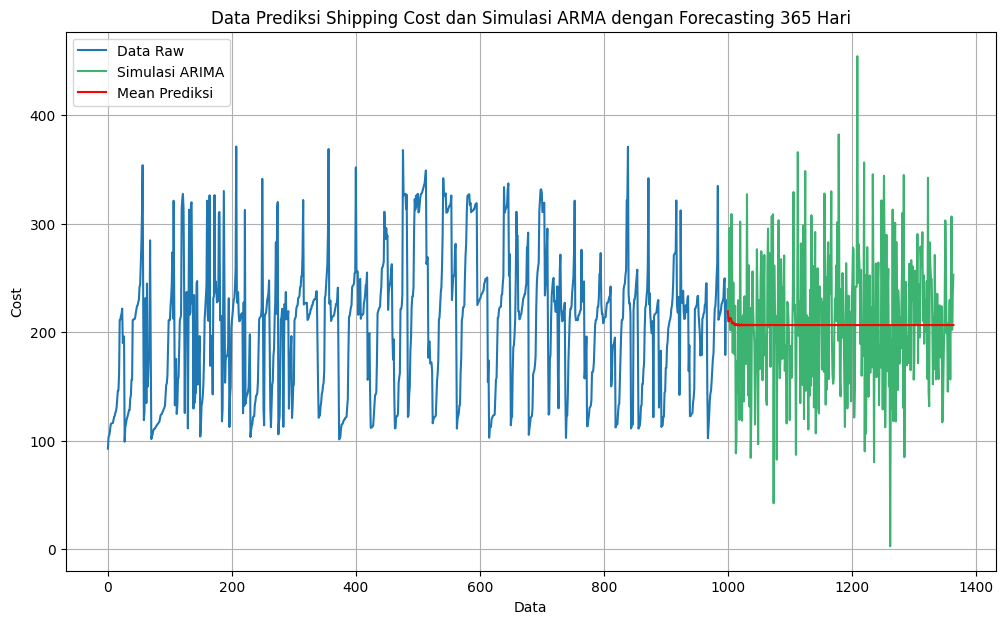

In [ ]:
# Plotting
plt.figure(figsize=(12, 7))

# Plot the original data
plt.plot(shipping_data['Shipping Cost ($)'], label='Data Raw')

# Plot the ARMA simulation
plt.plot(forecast_data.index, forecast_data['simulated_arima'], label='Simulasi ARIMA', color='mediumseagreen')

# Plot the predicted mean
plt.plot(forecast_data.index, forecast_data['predicted_mean'], label='Mean Prediksi', color='red')

# Add titles and labels
title = f'Data Prediksi Shipping Cost dan Simulasi ARMA dengan Forecasting {forecast_steps} Hari'
plt.title(title)
plt.xlabel('Data')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Penilaian kualitas prakiraan untuk menilai kualitas prakiraan, perlu membandingkan data simulasi ARMA(3,0,8) dengan data biaya pengiriman sebenarnya. Tujuannya adalah untuk melihat seberapa baik model dapat mewakili variasi, tren, dan instabilitas data asli. Jika hasil simulasi sangat mendekati data sebenarnya, maka model dianggap  memiliki kinerja yang baik.  
Analisis Perbandingan Metode dengan memasukkan rata-rata data prediksi, dapat dilakukan analisis untuk menilai apakah penggunaan rata-rata  kedua metode (data nyata dan simulasi ARMA) memberikan hasil yang lebih baik dibandingkan menggunakan masing-masing metode secara terpisah. Pendekatan ini dapat memberikan wawasan tentang potensi manfaat tambahan melalui kombinasi atau ansambel model yang mungkin lebih efektif.  
Dengan demikian, proses analisis ini dapat memberikan pemahaman yang lebih mendalam tentang efektivitas model ARMA(3,0,8) dalam memperkirakan data biaya, serta mempertimbangkan manfaat tambahan yang dapat diperoleh dari penggunaan pendekatan rata-rata.


